In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port,
                                                          postgres_db))
usedu_df = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [36]:
usedu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [37]:
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'orange').generate(''.join(usedu_df['PRIMARY_KEY']))

plt.figure(figsize=(100,50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
usedu_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


In [39]:
usedu_df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


In [40]:
usedu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [41]:
usedu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [42]:
usedu_df.groupby('STATE').describe()

YEAR                                 \
                                         count         mean       std     min   
STATE                                                                           
ALABAMA                                   26.0  2004.500000  7.648529  1992.0   
ALASKA                                    26.0  2004.500000  7.648529  1992.0   
AMERICAN_SAMOA                            22.0  2003.272727  6.929453  1992.0   
ARIZONA                                   26.0  2004.500000  7.648529  1992.0   
ARKANSAS                                  26.0  2004.500000  7.648529  1992.0   
AS                                         1.0  1998.000000       NaN  1998.0   
BI                                         4.0  2008.500000  7.047458  1998.0   
BIE                                        2.0  2005.500000  0.707107  2005.0   
BUREAU_OF_INDIAN_AFFAIRS                   6.0  2003.166667  5.492419  1999.0   
BUREAU_OF_INDIAN_EDUCATIO                  1.0  2004.000000       NaN  2004.0   
BUREAU_OF_INDIAN_EDUCATION                 2.0  2011.000000  5.656854  2007.0   
CALIFORNIA                                26.0  2004.500000  7.648529  1992.0   
COLORADO                                  26.0  2004.500000  7.648529  1992.0   
COMMONWEALTH_OF_MARIANAS                   3.0  1995.000000  2.645751  1992.0   
CONNECTICUT                               26.0  2004.500000  7.648529  1992.0   
DD                                         4.0  2008.500000  7.047458  1998.0   
DELAWARE                                  26.0  2004.500000  7.648529  1992.0   
DEPARTMENT_OF_DEFENSE                      1.0  2014.000000       NaN  2014.0   
DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY   1.0  2015.000000       NaN  2015.0   
DISTRICT_OF_COLUMBIA                      29.0  2004.965517  7.365376  1992.0   
DOD                                        1.0  1996.000000       NaN  1996.0   
DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)       1.0  2010.000000       NaN  2010.0   
DOD_-_DOMESTIC                             2.0  2008.000000  1.414214  2007.0   
DOD_-_FOREIGN                              1.0  1997.000000       NaN  1997.0   
DOD_-_OVERSEAS                             2.0  2008.000000  1.414214  2007.0   
DOD_DOMESTIC                               8.0  2002.500000  2.449490  1999.0   
DOD_OVERSEAS                               8.0  2002.500000  2.449490  1999.0   
FLORIDA                                   26.0  2004.500000  7.648529  1992.0   
GEORGIA                                   26.0  2004.500000  7.648529  1992.0   
GU                                         1.0  1998.000000       NaN  1998.0   
...                                        ...          ...       ...     ...   
NEVADA                                    26.0  2004.500000  7.648529  1992.0   
NEW_HAMPSHIRE                             26.0  2004.500000  7.648529  1992.0   
NEW_JERSEY                                26.0  2004.500000  7.648529  1992.0   
NEW_MEXICO                                26.0  2004.500000  7.648529  1992.0   
NEW_YORK                                  26.0  2004.500000  7.648529  1992.0   
NORTHERN_MARIANAS                         14.0  2003.000000  5.068758  1993.0   
NORTHERN_MARIANA_ISLANDS                   3.0  2012.000000  1.000000  2011.0   
NORTH_CAROLINA                            26.0  2004.500000  7.648529  1992.0   
NORTH_DAKOTA                              26.0  2004.500000  7.648529  1992.0   
OHIO                                      26.0  2004.500000  7.648529  1992.0   
OKLAHOMA                                  26.0  2004.500000  7.648529  1992.0   
OREGON                                    26.0  2004.500000  7.648529  1992.0   
PENNSYLVANIA                              26.0  2004.500000  7.648529  1992.0   
PR                                         1.0  1998.000000       NaN  1998.0   
PUERTO_RICO                               23.0  2003.739130  7.130073  1992.0   
RHODE_ISLAND                              26.0  2004.500000  7.648529  19

In [43]:
ncedu_df = usedu_df[usedu_df['STATE']=='NORTH_CAROLINA'][['YEAR', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]

In [44]:
ncedu_df

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
33,1992,5236099.0,5418687.0
86,1993,5583166.0,5475174.0
138,1994,5648390.0,5740906.0
191,1995,6076939.0,6217951.0
242,1996,6516400.0,6517111.0
293,1997,6827952.0,7007690.0
345,1998,7516979.0,7688076.0
397,1999,8476795.0,8674393.0
450,2000,9064700.0,9275837.0
502,2001,9670620.0,9807815.0


In [45]:
x = np.array(ncedu_df['YEAR'])
y_TR = np.array(ncedu_df['TOTAL_REVENUE'])
y_TE = np.array(ncedu_df['TOTAL_EXPENDITURE'])

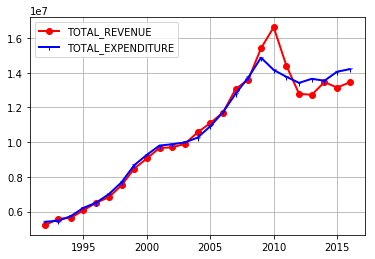

In [46]:
plt.plot(x, y_TR, color='red', linewidth=2.0, marker='o', label='TOTAL_REVENUE')
plt.plot(x, y_TE, color='blue', linewidth=2.0, marker='1', label='TOTAL_EXPENDITURE')
plt.legend(loc='uppper left')
plt.grid('on')
plt.show()

The reason in 2010 upsurge in Tooal Revenue is due to 'Kindergarden Cut Off'.  
The kindergarten cut-off implemented in 2009 ~ 2010, so a lot of kids couldn't enter kindergarten due to age block.  
So, the next year, in 2010 kindergarten kids who couldn't enter fomer year, they enter the kindergarten in 2010.  

In this reason, the government people who set the annual revenue had a consideration of the kids.

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?


In [47]:
usedu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [48]:
usedu_df['AVG_MATH'] = (usedu_df['AVG_MATH_4_SCORE'] + usedu_df['AVG_MATH_8_SCORE'])/2

In [49]:
usedu_df['AVG_READING'] = (usedu_df['AVG_READING_4_SCORE'] + usedu_df['AVG_READING_8_SCORE'])/2

In [50]:
ncMR_df = usedu_df[usedu_df['STATE']=='NORTH_CAROLINA'][['AVG_MATH', 'AVG_READING']]

In [51]:
ncMR_df.head()

,AVG_MATH,AVG_READING
33,235.644932,NaN
86,NaN,NaN
138,NaN,NaN
191,NaN,NaN
242,246.079843,242.02785


In [52]:
ncMR2_df = usedu_df[usedu_df['STATE']=='NORTH_CAROLINA'][['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]

In [53]:
ncMR2_df

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
33,212.884490,258.405375,214.358086,NaN
86,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN
242,224.325125,267.834560,216.837463,267.218236
293,NaN,NaN,NaN,NaN
345,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN
450,232.463065,280.127947,221.634040,255.021193
502,NaN,NaN,NaN,NaN


In [54]:
ncMR_df.describe(include='all')

,AVG_MATH,AVG_READING
count,11.000000,10.000000
mean,258.417014,242.646190
std,9.311319,3.824086
min,235.644932,236.568500
25%,258.867108,240.146347
50%,261.640238,242.830868
75%,263.402440,244.230156
max,265.392465,249.302851


At this point, let's set aside of the'NaN' data.  
Then, as you can see, Math score is slightly better than reading score.

### 4. What are the distributions of the math and reading scores in the sample?

In [55]:
ncM_df = usedu_df[usedu_df['STATE']=='NORTH_CAROLINA'][['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']]
ncR_df = usedu_df[usedu_df['STATE']=='NORTH_CAROLINA'][['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]

In [56]:
ncM_df.head()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE
33,212.884490,258.405375
86,NaN,NaN
138,NaN,NaN
191,NaN,NaN
242,224.325125,267.834560


In [57]:
ncM_df['AVG_MATH_4_SCORE']

33      212.884490
86             NaN
138            NaN
191            NaN
242     224.325125
293            NaN
345            NaN
397            NaN
450     232.463065
502            NaN
553            NaN
606     242.040126
657            NaN
709     241.235549
761            NaN
814     241.617994
866            NaN
922     243.778460
974            NaN
1026    244.517901
1078           NaN
1130    244.801733
1181           NaN
1232    243.742267
1283           NaN
1480    240.951393
Name: AVG_MATH_4_SCORE, dtype: float64

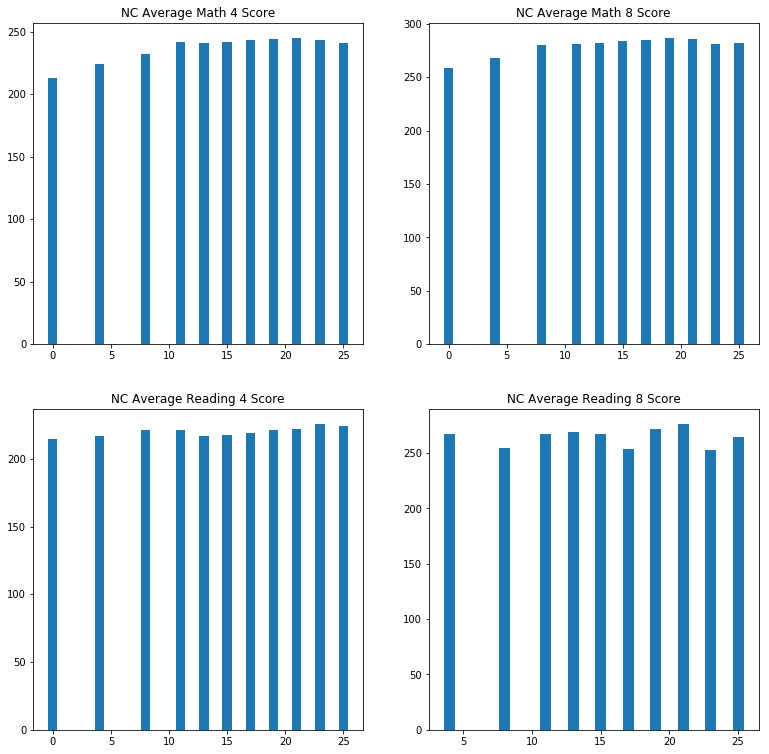

In [58]:
# This is histogram of raw data.
plt.figure(figsize=(13, 13))

xM4 = pd.DataFrame(ncM_df['AVG_MATH_4_SCORE'].reset_index(drop=True))
xM8 = pd.DataFrame(ncM_df['AVG_MATH_8_SCORE'].reset_index(drop=True))
xR4 = pd.DataFrame(ncR_df['AVG_READING_4_SCORE'].reset_index(drop=True))
xR8 = pd.DataFrame(ncR_df['AVG_READING_8_SCORE'].reset_index(drop=True))

plt.subplot(2,2,1)
plt.bar(xM4.index, xM4['AVG_MATH_4_SCORE'])
plt.title('NC Average Math 4 Score')

plt.subplot(2,2,2)
plt.bar(xM8.index, xM8['AVG_MATH_8_SCORE'])
plt.title('NC Average Math 8 Score')

plt.subplot(2,2,3)
plt.bar(xR4.index, xR4['AVG_READING_4_SCORE'])
plt.title('NC Average Reading 4 Score')

plt.subplot(2,2,4)
plt.bar(xR8.index, xR8['AVG_READING_8_SCORE'])
plt.title('NC Average Reading 8 Score')
plt.show()

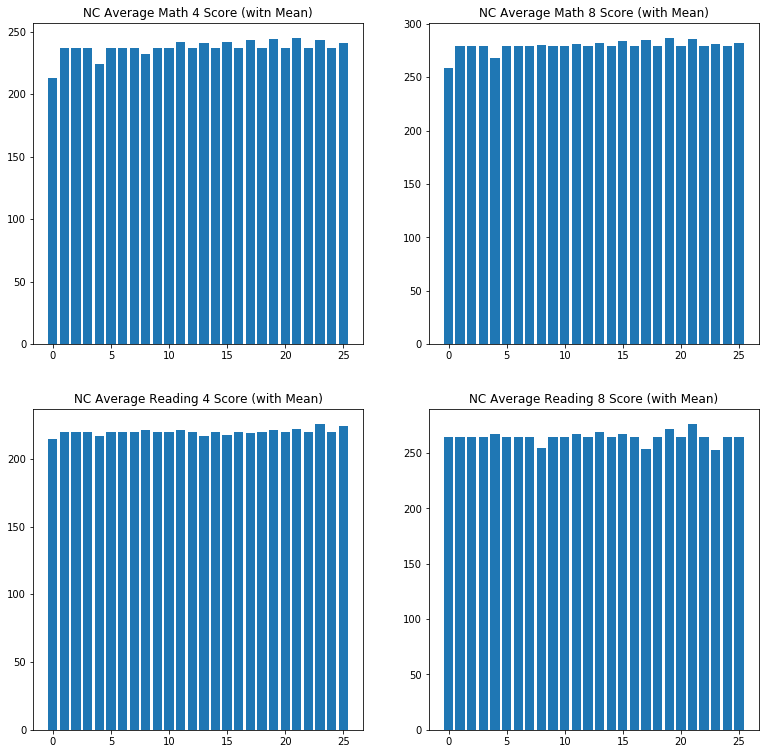

In [73]:
# This is histograms that put 'mean' into 'NaN'
mxM4 = pd.DataFrame(ncM_df['AVG_MATH_4_SCORE'].fillna(np.mean(ncM_df['AVG_MATH_4_SCORE'])).reset_index(drop=True))
mxM8 = pd.DataFrame(ncM_df['AVG_MATH_8_SCORE'].fillna(np.mean(ncM_df['AVG_MATH_8_SCORE'])).reset_index(drop=True))
mxR4 = pd.DataFrame(ncR_df['AVG_READING_4_SCORE'].fillna(np.mean(ncR_df['AVG_READING_4_SCORE'])).reset_index(drop=True))
mxR8 = pd.DataFrame(ncR_df['AVG_READING_8_SCORE'].fillna(np.mean(ncR_df['AVG_READING_8_SCORE'])).reset_index(drop=True))

plt.figure(figsize=(13, 13))

plt.subplot(2,2,1)
plt.bar(mxM4.index, mxM4['AVG_MATH_4_SCORE'].fillna(np.mean(mxM4['AVG_MATH_4_SCORE'])))
plt.title('NC Average Math 4 Score (witn Mean)')

plt.subplot(2,2,2)
plt.bar(mxM8.index, mxM8['AVG_MATH_8_SCORE'].fillna(np.mean(mxM8['AVG_MATH_8_SCORE'])))
plt.title('NC Average Math 8 Score (with Mean)')

plt.subplot(2,2,3)
plt.bar(mxR4.index, mxR4['AVG_READING_4_SCORE'].fillna(np.mean(mxR4['AVG_READING_4_SCORE'])))
plt.title('NC Average Reading 4 Score (with Mean)')

plt.subplot(2,2,4)
plt.bar(mxR8.index, mxR8['AVG_READING_8_SCORE'].fillna(np.mean(mxR8['AVG_READING_8_SCORE'])))
plt.title('NC Average Reading 8 Score (with Mean)')
plt.show()

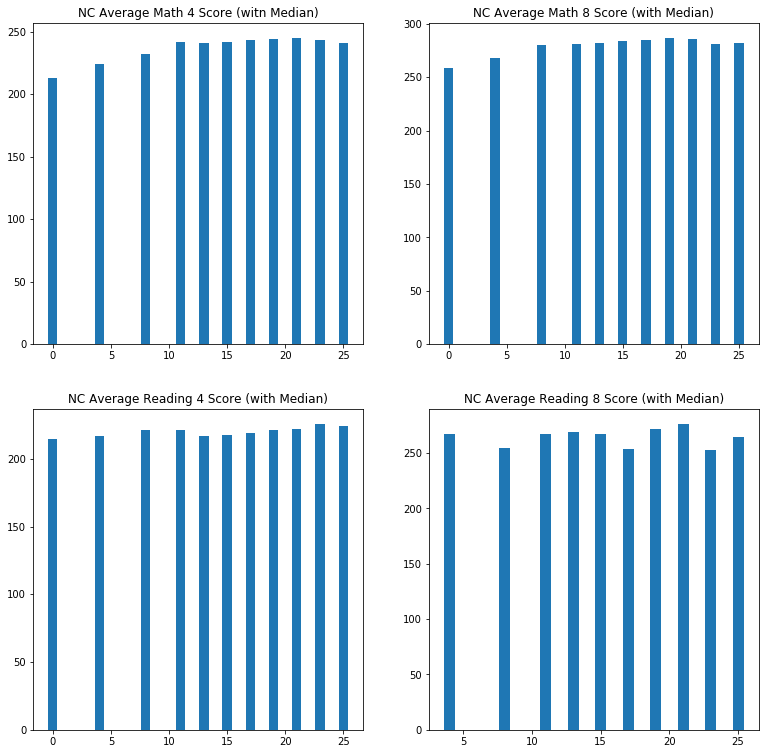

In [74]:
# This is histograms that put 'median' into 'NaN'

mdxM4 = pd.DataFrame(ncM_df['AVG_MATH_4_SCORE'].reset_index(drop=True))
mdxM8 = pd.DataFrame(ncM_df['AVG_MATH_8_SCORE'].reset_index(drop=True))
mdxR4 = pd.DataFrame(ncR_df['AVG_READING_4_SCORE'].reset_index(drop=True))
mdxR8 = pd.DataFrame(ncR_df['AVG_READING_8_SCORE'].reset_index(drop=True))

plt.figure(figsize=(13, 13))

plt.subplot(2,2,1)
plt.bar(mdxM4.index, mdxM4['AVG_MATH_4_SCORE'].fillna(np.median(mdxM4['AVG_MATH_4_SCORE'])))
plt.title('NC Average Math 4 Score (witn Median)')

plt.subplot(2,2,2)
plt.bar(mdxM8.index, mdxM8['AVG_MATH_8_SCORE'].fillna(np.median(mdxM8['AVG_MATH_8_SCORE'])))
plt.title('NC Average Math 8 Score (with Median)')

plt.subplot(2,2,3)
plt.bar(mdxR4.index, mdxR4['AVG_READING_4_SCORE'].fillna(np.median(mdxR4['AVG_READING_4_SCORE'])))
plt.title('NC Average Reading 4 Score (with Median)')

plt.subplot(2,2,4)
plt.bar(mdxR8.index, mdxR8['AVG_READING_8_SCORE'].fillna(np.median(mdxR8['AVG_READING_8_SCORE'])))
plt.title('NC Average Reading 8 Score (with Median)')
plt.show()

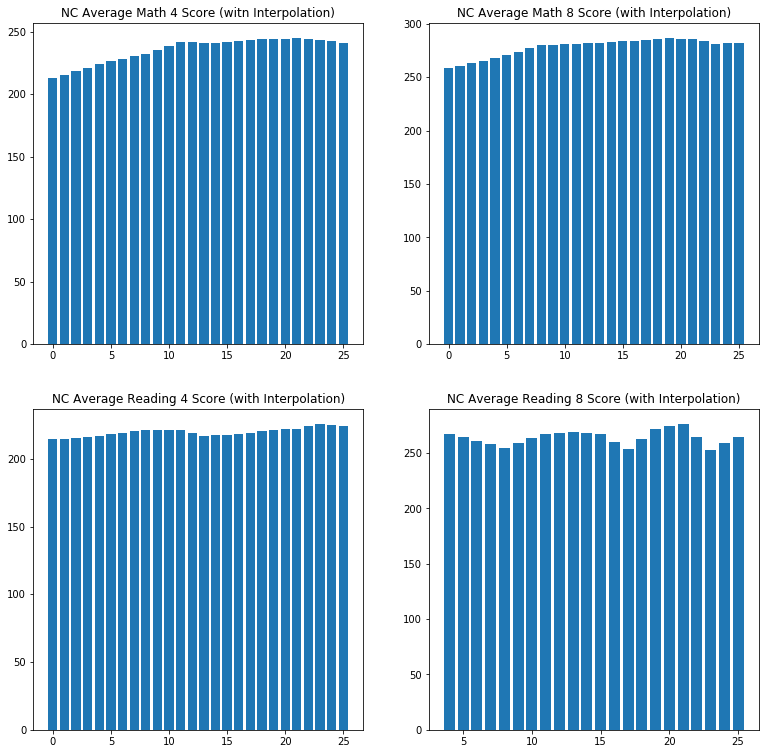

In [80]:
from scipy import interpolate



ixM4 = pd.DataFrame(ncM_df['AVG_MATH_4_SCORE'].reset_index(drop=True))
ixM8 = pd.DataFrame(ncM_df['AVG_MATH_8_SCORE'].reset_index(drop=True))
ixR4 = pd.DataFrame(ncR_df['AVG_READING_4_SCORE'].reset_index(drop=True))
ixR8 = pd.DataFrame(ncR_df['AVG_READING_8_SCORE'].reset_index(drop=True))

plt.figure(figsize=(13, 13))

plt.subplot(2,2,1)
plt.bar(ixM4.index, ixM4['AVG_MATH_4_SCORE'].fillna(ixM4['AVG_MATH_4_SCORE'].interpolate()))
plt.title('NC Average Math 4 Score (witn Interpolation)')

plt.subplot(2,2,2)
plt.bar(ixM8.index, ixM8['AVG_MATH_8_SCORE'].fillna(ixM8['AVG_MATH_8_SCORE'].interpolate()))
plt.title('NC Average Math 8 Score (with Interpolation)')

plt.subplot(2,2,3)
plt.bar(ixR4.index, ixR4['AVG_READING_4_SCORE'].fillna(ixR4['AVG_READING_4_SCORE'].interpolate()))
plt.title('NC Average Reading 4 Score (with Interpolation)')

plt.subplot(2,2,4)
plt.bar(ixR8.index, ixR8['AVG_READING_8_SCORE'].fillna(ixR8['AVG_READING_8_SCORE'].interpolate()))
plt.title('NC Average Reading 8 Score (with Interpolation)')
plt.show()

All done, The Interpolation bar charts are looked more decent and natural than 'Mean value' filled charts. 
Moreover, 'Median data' filled charts are as similar as raw date because median data is 'Nan'. It is caused there are a lot of 'nan' data.